> Enter K _the number of clusters you want_ and then watch the plot

5
[{1, 2, 4, 8, 12, 13, 14, 18, 20, 22}, {32, 3, 25, 26, 28, 29}, {5, 6, 7, 11, 17}, {33, 34, 9, 15, 16, 19, 21, 23, 24, 27, 30, 31}, {10}]
Number of connected components(clusters) =  5


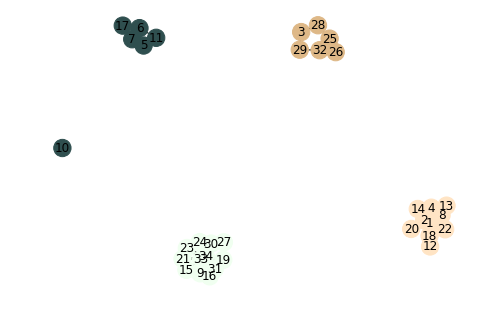

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import operator
import random
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

G = nx.read_gml('karate.gml',label='id')

while True:
    k = int(input())
    if k <= len(G.nodes()) and k > 0:break 
    print("Number of possible clusters must be between 1 and %d"%len(G.nodes()))

# Clustering

while nx.number_connected_components(G) < k:
    w = nx.edge_betweenness_centrality(G)
    mx=max(w.items(), key=operator.itemgetter(1))[0]
    G.remove_edge(mx[0],mx[1])
cnt = nx.number_connected_components(G)

# Coloring

color_map = [];

a = list(colors.cnames.values())
random.shuffle(a)
clusters = list(nx.connected_components(G));
print(clusters)
for node in list(G.nodes()):
    for i in range(0, len(clusters)):
        if node in list(clusters[i]):
            color_map.append(a[i]);

nx.draw(G, node_color = color_map, with_labels = True);

print("Number of connected components(clusters) = ",cnt)
